In [1]:
import random
from nn import MLP


In [2]:
random.seed(42)

## The input data

In [3]:

X = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0,1.0,-1.0]
]

## The predictor values

In [4]:
y = [1.0,-1.0,-1.0,1.0]

## The model
The model is a multi-layer percepron with 3 layers of size `[4,4,1]`

In [5]:
model=MLP(3,[4,4,1])
#pass the input data to the model to get predictions 
y_pred=[model(x) for x in X]

## The Loss function(MSE)

In [6]:
loss=sum((yout-ygt)**2 for ygt, yout in zip(y,y_pred))
loss

Value(data=5.230517512042234)

## Visualising the computation graph

In [7]:
#helper functions 
from graphviz import Digraph

def trace(root):
    nodes,edges=set(),set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child,v))
                build(child)
    build(root)
    return nodes,edges

def draw_dot(root):
    dot=Digraph(format='svg',graph_attr={'rankdir': 'LR'})
    nodes,edges=trace(root)
    for n in nodes:
        uid=str(id(n))
        dot.node(name=uid, label="{%s | data %.4f | grad %.4f }" % (n.label, n.data,n.grad ), shape='record')
        if n._op:
            dot.node(name=uid + n._op,label=n._op)
            dot.edge(uid + n._op,uid)
    for n1,n2 in edges:
        dot.edge(str(id(n1)),str(id(n2))+n2._op)
    return dot 

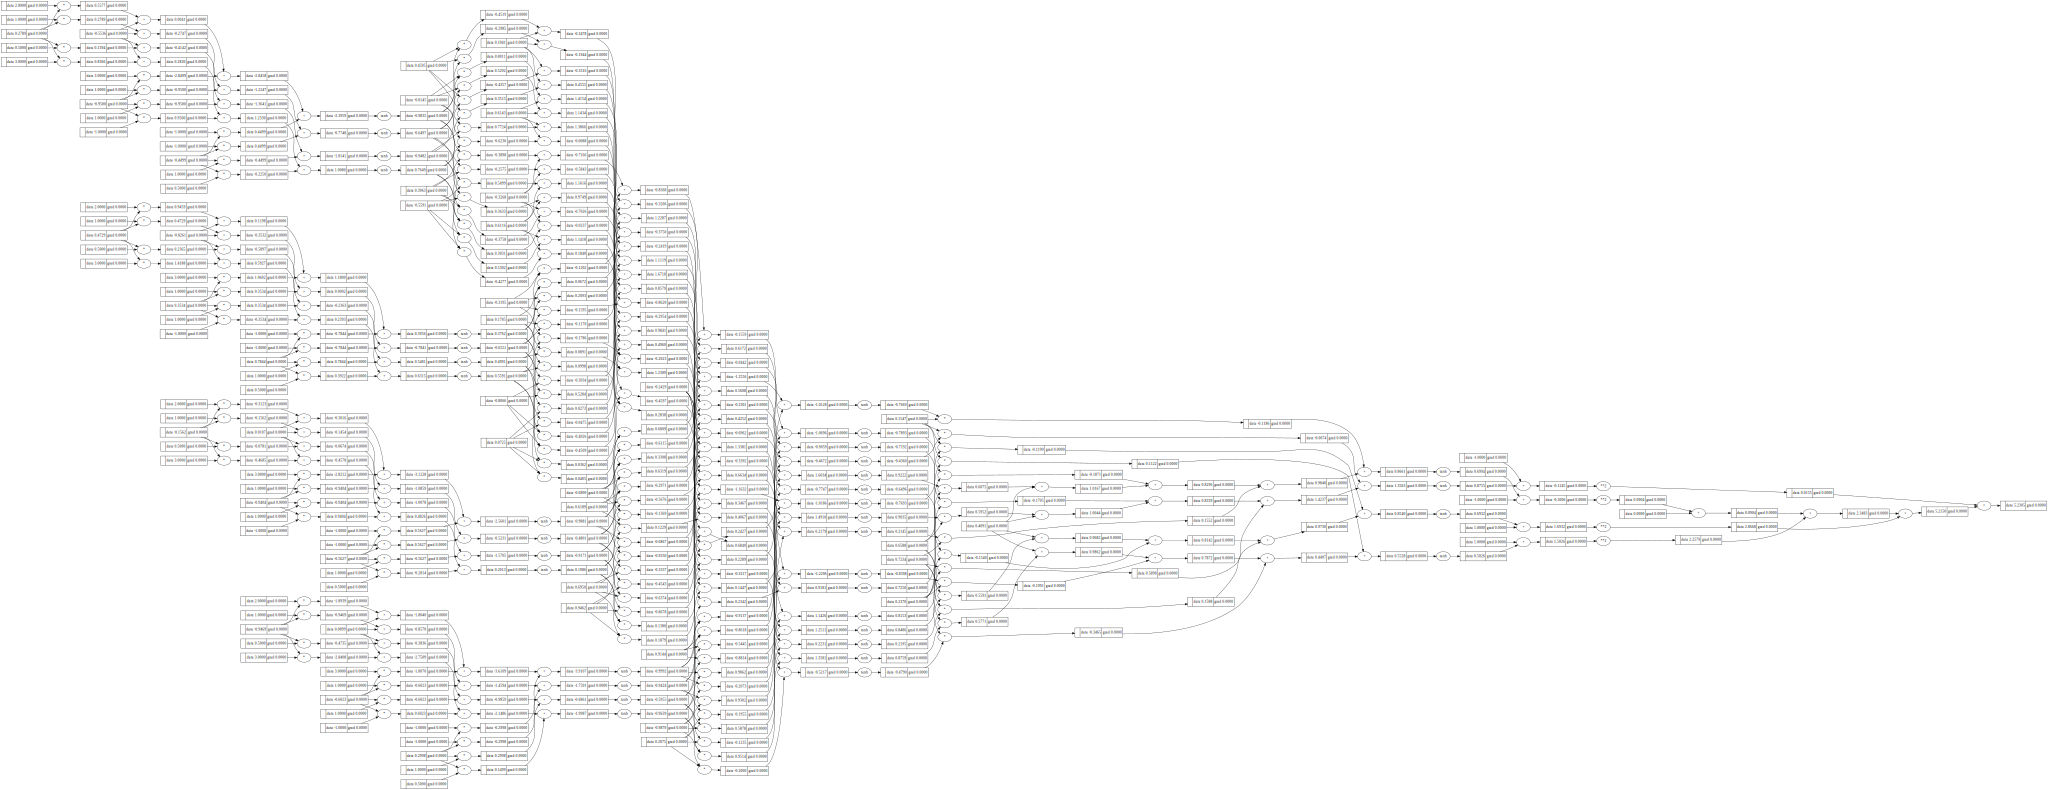

In [8]:
draw_dot(loss)

##  Optimisation

In [9]:
import math
epochs=50
learning_rate=0.3
caches = {p: 0.0 for p in model.parameters()}
epsilon=1e-7
for k in range(epochs):
    #forward pass
    y_pred=[model(x) for x in X]
    loss=sum((yout-ygt)**2 for ygt, yout in zip(y,y_pred))
    #zero grad
    for p in model.parameters():
        p.grad=0.0
    #backward pass
    loss.backward()
    #update(adagrad)
    for p in model.parameters():
        caches[p] += p.grad**2
        p.data+=(-learning_rate*p.grad) / (math.sqrt(caches[p] + epsilon))
    print(f'epoch:{k}:loss:',loss.data)



epoch:0:loss: 5.230517512042234
epoch:1:loss: 2.023666883507942
epoch:2:loss: 3.5340525154165467
epoch:3:loss: 0.5092222636685034
epoch:4:loss: 0.041667639068450724
epoch:5:loss: 0.032746527457310756
epoch:6:loss: 0.027013451851778503
epoch:7:loss: 0.022965564603256692
epoch:8:loss: 0.019932458328079654
epoch:9:loss: 0.01756512046691465
epoch:10:loss: 0.015662054784840233
epoch:11:loss: 0.014097859672832159
epoch:12:loss: 0.012789866728381918
epoch:13:loss: 0.011681020613663391
epoch:14:loss: 0.010730438456021063
epoch:15:loss: 0.009907899449587922
epoch:16:loss: 0.009190475697291426
epoch:17:loss: 0.00856038993085619
epoch:18:loss: 0.008003605936775493
epoch:19:loss: 0.007508872168668201
epoch:20:loss: 0.007067054411877661
epoch:21:loss: 0.006670658050362446
epoch:22:loss: 0.006313478015542806
epoch:23:loss: 0.005990336897355297
epoch:24:loss: 0.005696885393860527
epoch:25:loss: 0.005429447831790042
epoch:26:loss: 0.005184900945514118
epoch:27:loss: 0.004960577651178042
epoch:28:loss:

In [10]:
y_pred

[Value(data=0.9807714607392072),
 Value(data=-0.9818680151999308),
 Value(data=-0.9647345140317858),
 Value(data=0.9758966729427814)]

The Loss goes down at every epoch nearing zero. The predictions almost exactly much the original values as well.